In [2]:
import pandas as pd
import seaborn as sns 

from matplotlib import pyplot as plt 
%matplotlib inline
sns.set_style("whitegrid")
sns.set(rc={'figure.figsize':(11.7,8.27)})

import warnings 
warnings.filterwarnings("ignore")

In [3]:
df = pd.read_csv("SpotifyFeatures.csv")

### <b>Data Description</b>
<font size=3>

- <b>instance_id : </b> Serial number of the song in the dataset.
- <b>artist_name :</b> Name of the artist of the song.
- <b>track_name :</b> Title of the song.
- <b>popularity :</b> An arbitrary score assigned to the song in the range of 0-100 with 100 being most popular and 0 being least.
- <b>acousticness :</b> This value describes how acoustic a song is. A score of 1.0 means the song is most likely to be an acoustic one.
- <b>danceability :</b> Danceability describes how suitable a track is for dancing based on a combination of musical elements. A value of 0.0 is least danceable and 1.0 is most danceable
- <b>duration_ms :</b> Is the duration in milliseconds of the song.
- <b>energy :</b> Represents how energetic the song is. The range of this field is between [0-1] with 1 being song with highest energy and 0 with lowest.
- <b>instrumentalness :</b> This value represents the amount of vocals in the song. The closer it is to 1.0, the more instrumental the song is
- <b>key :</b> Key of a piece is the group of pitches, or scale, that forms the basis of a music composition.
- <b>liveness :</b> This value describes the probability that the song was recorded with a live audience.
- <b>loudness :</b> Column representing how loud the song is.
- <b>mode :</b> Major and Minor scales that the song is based upon.
- <b>speechiness :</b> Speechiness detects the presence of spoken words in a track.
- <b>tempo :</b> Speed at which the song is being played.
- <b>time_signature :</b> The date at which the song metadata was retrieved.
- <b>valence :</b> A measure from 0.0 to 1.0 describing the musical positiveness conveyed by a track. Tracks with high valence sound more positive.
- <b>music_genre :</b> The actual category to which the song belongs. This is our target variable.

</font>

<font color='red'> <b>NOTE: </b> </font> Description of the dataset was derived from [this notebook](https://www.kaggle.com/ashwinrachha1/thrasio-data-science-assesment)


In [6]:
df.head()

,genre,artist_name,track_name,track_id,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence
0,Opera,Giuseppe Verdi,"Stiffelio, Act III: Ei fugge! … Lina, pensai c...",7EsKYeHtTc4H4xWiTqSVZA,21,0.986,0.313,490867,0.23100,0.000431,C#,0.0964,-14.287,Major,0.0547,86.001,4/4,0.0886
1,Opera,Giacomo Puccini,Madama Butterfly / Act 1: ... E soffitto e pareti,7MfmRBvqaW0I6UTxXnad8p,18,0.972,0.360,176797,0.20100,0.028000,D#,0.1330,-19.794,Major,0.0581,131.798,4/4,0.3690
2,Opera,Giacomo Puccini,"Turandot / Act 2: Gloria, gloria, o vincitore",7pBo1GDhIysyUMFXiDVoON,10,0.935,0.168,266184,0.47000,0.020400,C,0.3630,-8.415,Major,0.0383,75.126,3/4,0.0696
3,Opera,Giuseppe Verdi,"Rigoletto, Act IV: Venti scudi hai tu detto?",02mvYZX5aKNzdqEo6jF20m,17,0.961,0.250,288573,0.00605,0.000000,D,0.1200,-33.440,Major,0.0480,76.493,4/4,0.0380
4,Opera,Giuseppe Verdi,"Don Carlo / Act 4: ""Ella giammai m'amò!""",03TW0jwGMGhUabAjOpB1T9,19,0.985,0.142,629760,0.05800,0.146000,D,0.0969,-23.625,Major,0.0493,172.935,4/4,0.0382


In [4]:
df.shape

(228159, 18)

In [5]:
df.time_signature.unique()

array(['4/4', '3/4', '1/4', '5/4', '0/4'], dtype=object)

In [11]:
df.sample(10)

,genre,artist_name,track_name,track_id,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence
9543,Alternative,Linkin Park,Breaking The Habit,4HcDu9IGRCvSTJE4yW5Ugv,60,0.10800,0.579,196907,0.8490,0.000000,E,0.0909,-5.218,Minor,0.0303,100.021,4/4,0.5810
94915,Children’s Music,MED,Drive In,6mBbycgdWgHMPNyJLCEoW6,49,0.07900,0.484,239787,0.6600,0.000004,C,0.3330,-11.224,Major,0.1460,88.418,4/4,0.5880
202296,World,Sean Feucht,There Is a Name (Live),1c4djybfa6TS07oMspWYfL,36,0.02730,0.415,551027,0.5810,0.000000,C#,0.6660,-9.240,Major,0.0409,145.734,4/4,0.1930
163019,Reggaeton,Zion & Lennox,Pierdo la Cabeza (DJ Lobo Remix) [feat. Shadow...,3IOFEAybqg6nesj2uS0Fyp,28,0.52700,0.804,234581,0.7920,0.000000,C,0.3110,-5.774,Major,0.0489,93.014,4/4,0.7250
122779,Comedy,Alonzo Bodden,Who to Hate,622Vae2RIfutYxheq6HC61,10,0.86000,0.615,68267,0.5550,0.000000,G,0.8780,-11.452,Major,0.9650,170.765,3/4,0.7120
103744,Rap,Night Lovell,PAIN,3PgRUeQuuY94FkKdDBbKvq,57,0.45800,0.833,152348,0.6460,0.387000,A#,0.0845,-8.015,Minor,0.0361,115.005,4/4,0.2950
98695,Rap,Linkin Park,Given Up,1fLlRApgzxWweF1JTf8yM5,68,0.00117,0.655,189293,0.8850,0.000473,G,0.0448,-4.116,Major,0.0438,100.088,4/4,0.9380
218272,Rock,Chubby Checker,The Twist,3ohLnESFgYACPMCkoTOzqE,59,0.20200,0.533,153760,0.6380,0.000000,E,0.0729,-7.130,Major,0.0341,156.663,4/4,0.9370
116060,Classical,Antonín Dvořák,"Rusalka, Op. 114, B. 203, Act I: Staletá moudr...",74oWMEQnnOsDnZwiQL7IT0,0,0.97500,0.245,444480,0.1190,0.000015,D,0.0643,-18.596,Major,0.0804,68.382,4/4,0.0473
116828,Classical,Frédéric Chopin,"Nocturnes, Op. 15: No. 2 in F sharp major. Lar...",4YBw6EAdwlm69OY2F08dEM,44,0.99300,0.281,216093,0.0202,0.910000,F#,0.1270,-26.099,Major,0.0395,77.814,4/4,0.0655


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 228159 entries, 0 to 228158
Data columns (total 18 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   genre             228159 non-null  object 
 1   artist_name       228159 non-null  object 
 2   track_name        228159 non-null  object 
 3   track_id          228159 non-null  object 
 4   popularity        228159 non-null  int64  
 5   acousticness      228159 non-null  float64
 6   danceability      228159 non-null  float64
 7   duration_ms       228159 non-null  int64  
 8   energy            228159 non-null  float64
 9   instrumentalness  228159 non-null  float64
 10  key               228159 non-null  object 
 11  liveness          228159 non-null  float64
 12  loudness          228159 non-null  float64
 13  mode              228159 non-null  object 
 14  speechiness       228159 non-null  float64
 15  tempo             228159 non-null  float64
 16  time_signature    22

In [4]:
print("Unique Keys -> ", len(df.key.unique()))
df.key.unique()

Unique Keys ->  12


array(['C#', 'D#', 'C', 'D', 'G#', 'F#', 'B', 'A', 'G', 'E', 'A#', 'F'],
      dtype=object)

In [5]:
print("Unique Genres -> ", len(df.genre.unique()))
df.genre.unique()

Unique Genres ->  26


array(['Opera', 'A Capella', 'Alternative', 'Blues', 'Dance', 'Pop',
       'Electronic', 'R&B', 'Children’s Music', 'Folk', 'Anime', 'Rap',
       'Classical', 'Reggae', 'Hip-Hop', 'Comedy', 'Country', 'Reggaeton',
       'Ska', 'Indie', 'Rock', 'Soul', 'Soundtrack', 'Jazz', 'World',
       'Movie'], dtype=object)

In [6]:
print("Unique Artists -> ",len(df.artist_name.unique()))

Unique Artists ->  13318


## Exploratory Data Analysis

- check for bias (across genres, key, mode)
- dist of popularity
- Correlation Matrix
- popularity relation with features (regression)

### Checking data balance

In [7]:
df1 = df.groupby('genre', as_index=False).size().sort_values(by='size',ascending=True)
df2 = df.groupby('key', as_index=False).size().sort_values(by='size',ascending=True)
df3 = df.groupby('mode', as_index=False).size().sort_values(by='size',ascending=True)

Text(0.5, 1.0, 'Number of songs per genre')

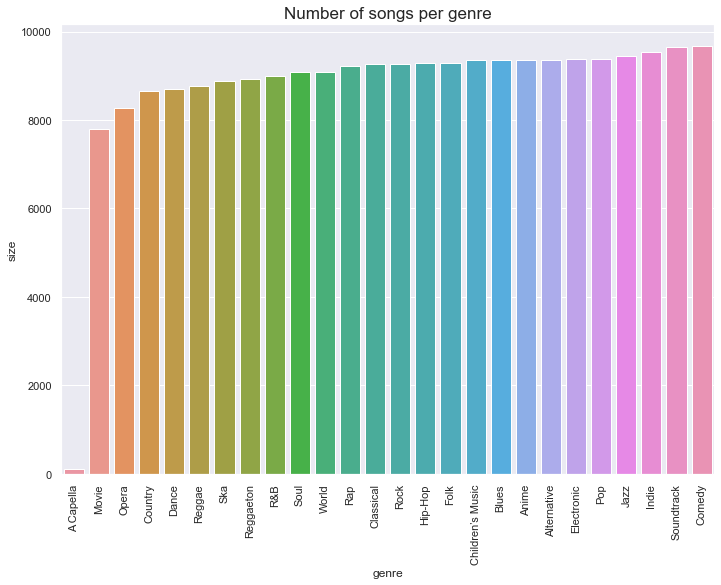

In [8]:
plt.xticks(rotation=90)
sns.barplot(x='genre', y='size', data=df1).set_title("Number of songs per genre", fontsize=17)

In [9]:
df1.head(3)

,genre,size
0,A Capella,119
14,Movie,7806
15,Opera,8280


Text(0.5, 1.0, 'Number of songs per key')

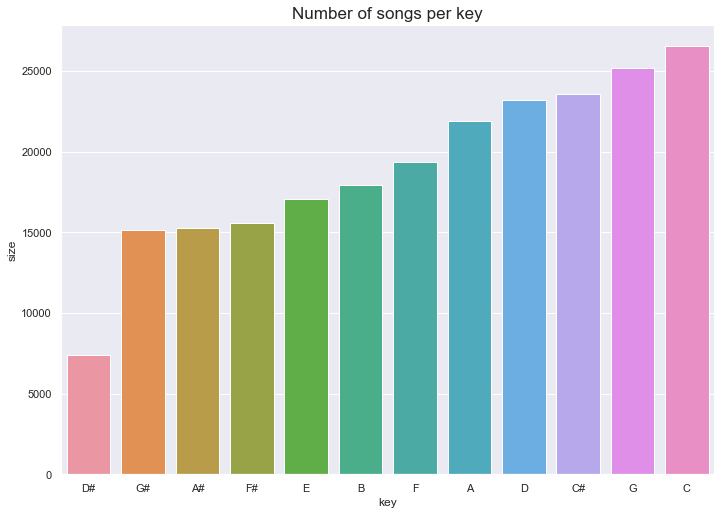

In [10]:
sns.barplot(x='key', y='size', data=df2).set_title("Number of songs per key", fontsize=17)

Text(0.5, 1.0, 'Number of songs per mode')

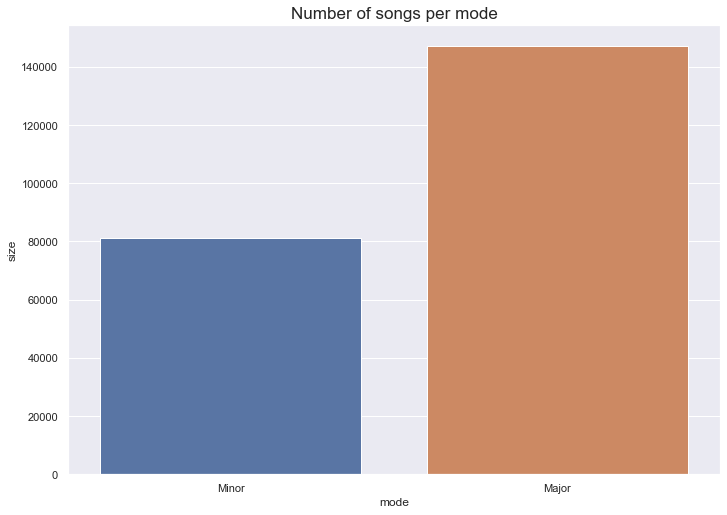

In [11]:
sns.barplot(x='mode', y='size', data=df3).set_title("Number of songs per mode", fontsize=17)

Text(0.5, 1.0, 'Distribution of Popularity')

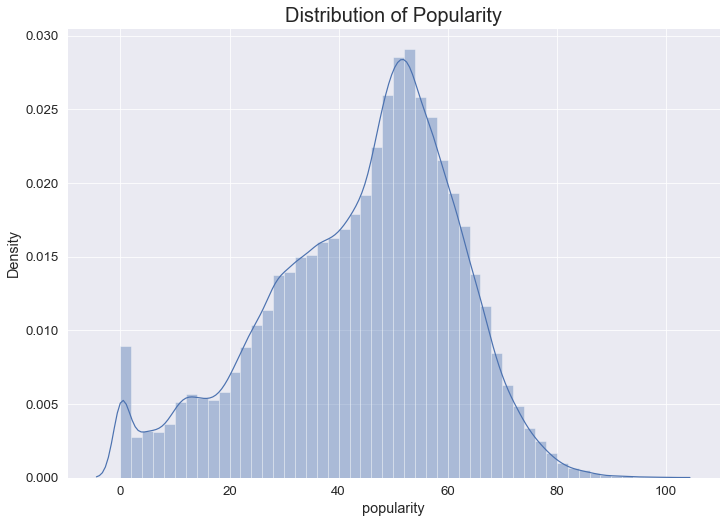

In [12]:
# Distribution of popularity score
sns.set_context("paper", font_scale=1.5)
sns.distplot(df.popularity).set_title("Distribution of Popularity", fontsize=20)